# ML-8. Продвинутые методы машинного обучения

# 1. Введение

→ В прошлом модуле мы научились важному этапу в разработке модели — поиску оптимальных гиперпараметров. Этот этап важен для получения лучшего качества модели. 

В этом модуле мы поговорим о способах ансамблирования и сбора в пайплайн как о дальнейшем шаге развёртывания модели. Дальнейшим этапом в освоении профессии дата-сайентиста станет погружение в тематику задач и основных методов решения задач **metric learning**.

⬇️ Прежде чем приступить к освоению ансамблирования и пайплайнов, предлагаем пройти небольшой тест, чтобы освежить знания об архитектуре моделей машинного обучения.

### О чём этот модуль?

Вспомнив основные понятия при работе с данными, мы можем перейти к краткому ознакомлению с темами модуля. 

### Ансамблирование моделей

При изучении Data Science идея ансамблирования впервые встречается при упоминании такой модели, как случайный лес. В данной модели обучаются базовые модели, представленные решающими деревьями,  предсказания которых впоследствии агрегируются некоторым образом, зависящим от задачи. В случае задачи регрессии берётся среднее либо средневзвешенное. В случае задачи классификации класс присваивается по принципу большинства.    

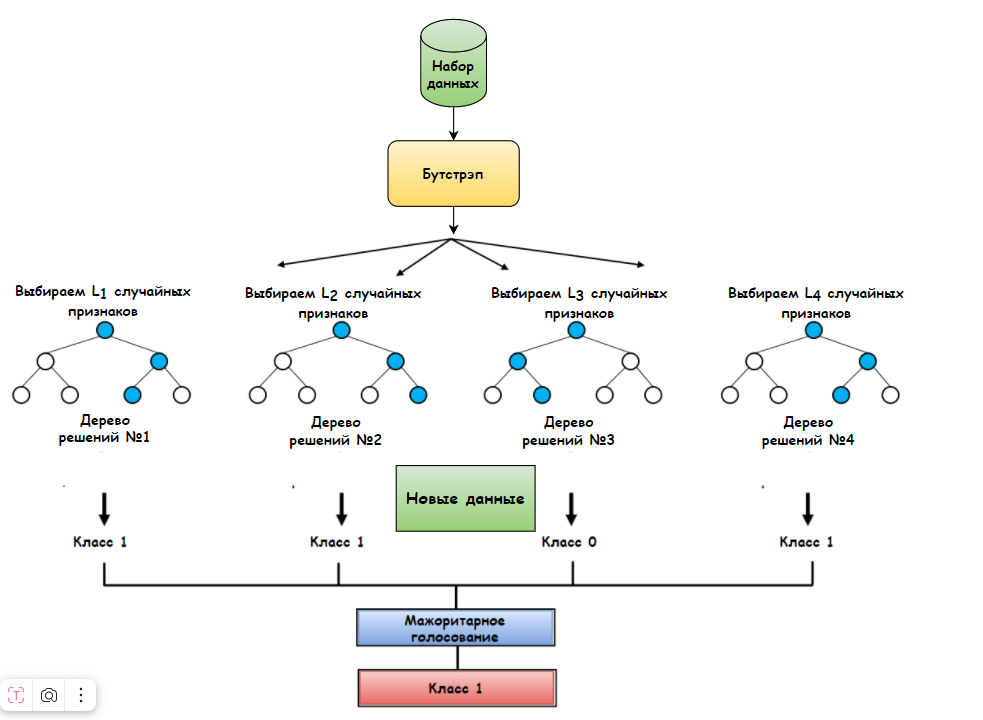

Этот знакомый нам подход построения ансамбля называется **бэггингом** и позволяет улучшить качество предсказания. Однако существуют и другие техники ансамблирования, которым и посвятим часть модуля.

### Pipeline

Как известно, любая задача классического машинного обучения сводится к этапам обработки данных с последующей генерацией признаков. Позднее признаки отбираются и подаются на модель, которую в свою очередь обучают и настраивают, находя оптимальные гиперпараметры. Качество модели проверяют с помощью методов валидации (например, **кросс-валидации**). 

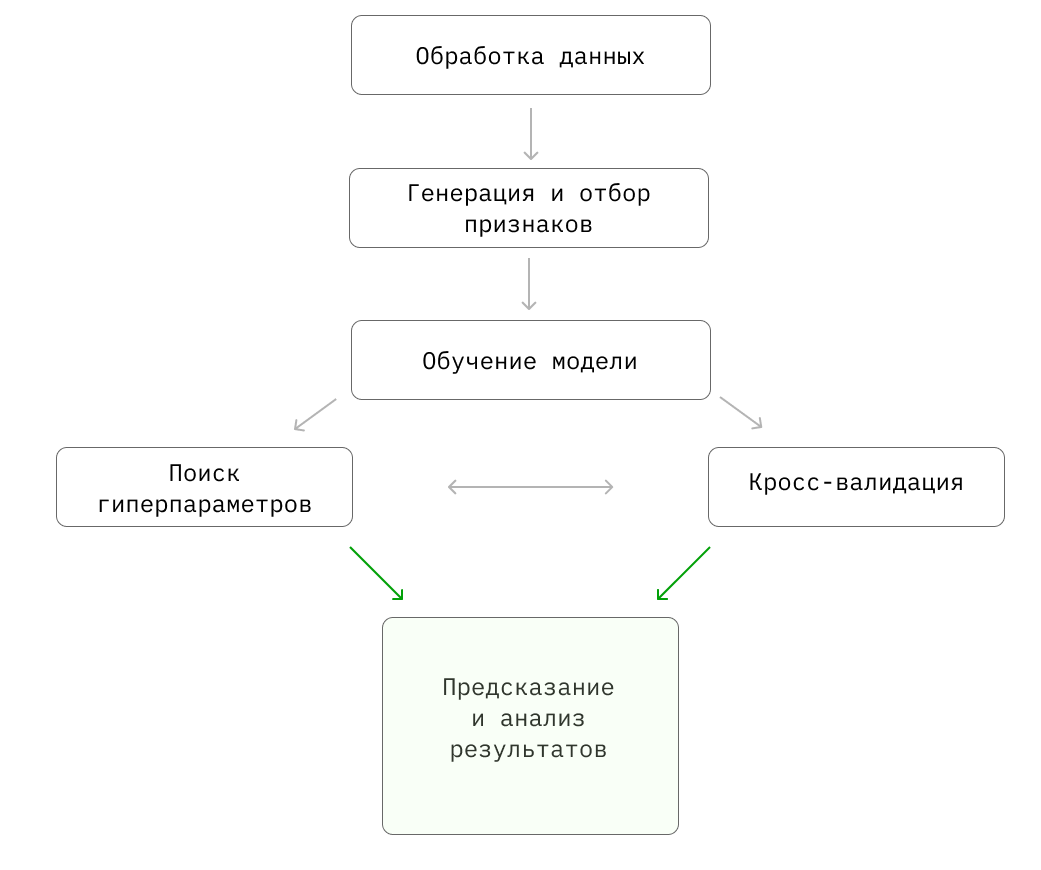

Процесс автоматического поэтапного выполнения манипуляций с данными, включающий в себя сбор, обработку, генерацию и отбор признаков, обучение модели с последующей её настройкой и проверкой качества называется **пайплайном**. 

### Metric Learning

Любые подходы в машинном обучении, которые требуют измерения расстояния между объектами в выборке, являются подходами **metric learning** (часто их обозначают как **метрические алгоритмы**). Основными задачами, решаемыми подходами metric learning, наряду с классическими задачами обучения с учителем, являются задача **кластеризации** и задача **понижения размерности**. Также metric learning иногда используется в задачах восстановления данных по принципу нахождения ближайшего похоже объекта.

В этом модуле мы научимся применять на практике основные методы и подходы metric learning, в частности **kNN, k-means**.

#### Цели модуля

Целями модуля являются:

✔️ Научиться самостоятельно ансамблировать различными методами модели для повышения качества предсказаний.

✔️ Освоить практические методы создания пайплайнов и создать свой.

✔️ Применить подходы metric learning на практике.

# 2. Ансамблирование: бэггинг, случайный лес

→ Основным подходом для улучшения качества слабых и нестабильных моделей является обучение моделей для решения одной и той же поставленной задачи с последующим объединением и получением некоторого более сильного и стабильного консенсус-решения.  Как мы знаем, модели, используемые для ансамблирования, называются **базовыми**.

Существует три основных способа построения ансамблей:

- **Бэггинг** — параллельно обучаем множество одинаковых моделей, а для предсказания берём среднее по предсказаниям каждой из моделей.
- **Бустинг** — последовательно обучаем множество одинаковых моделей, где каждая новая модель концентрируется на тех примерах, где предыдущая допустила ошибку.
- **Стекинг** — параллельно обучаем множество разных моделей, отправляем их результаты в финальную модель, и уже она принимает решение. 

**Бэггинг (bagging)** — алгоритм построения ансамбля путём параллельного обучения множества независимых друг от друга моделей.

Самым распространённым примером ансамбля типа бэггинг является уже знакомый нам **случайный лес (Random Forest)**. 

Вам уже известно, что случайный лес является ансамблем решающих деревьев, в котором выборка выбирается посредством бутстрапа. Далее каждое решающее дерево обучается на случайной подвыборке из признакового пространства. Иными словами, случайный лес содержит в себе две случайности: случайная выборка для обучения и случайное множество признаков. 

После обучения отдельные решающие деревья объединяются в ансамбль. Ранее мы узнали, что в случайном лесу для задачи **классификации** ансамблирование происходит посредством большинства голосов (Majority Vote). Для задачи **регрессии** же ансамблирование происходит посредством усреднения результата предсказания каждой базовой модели (Averaging).

Давайте рассмотрим это на примере. 

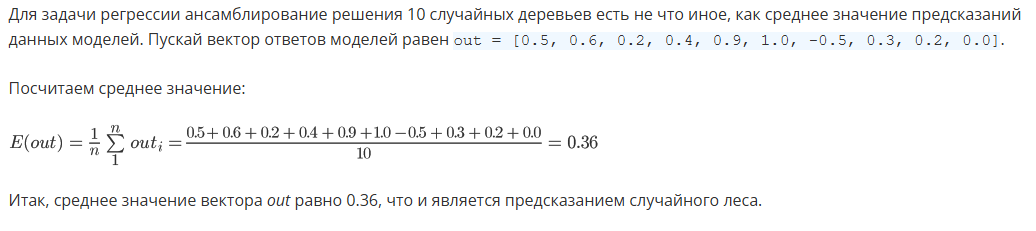

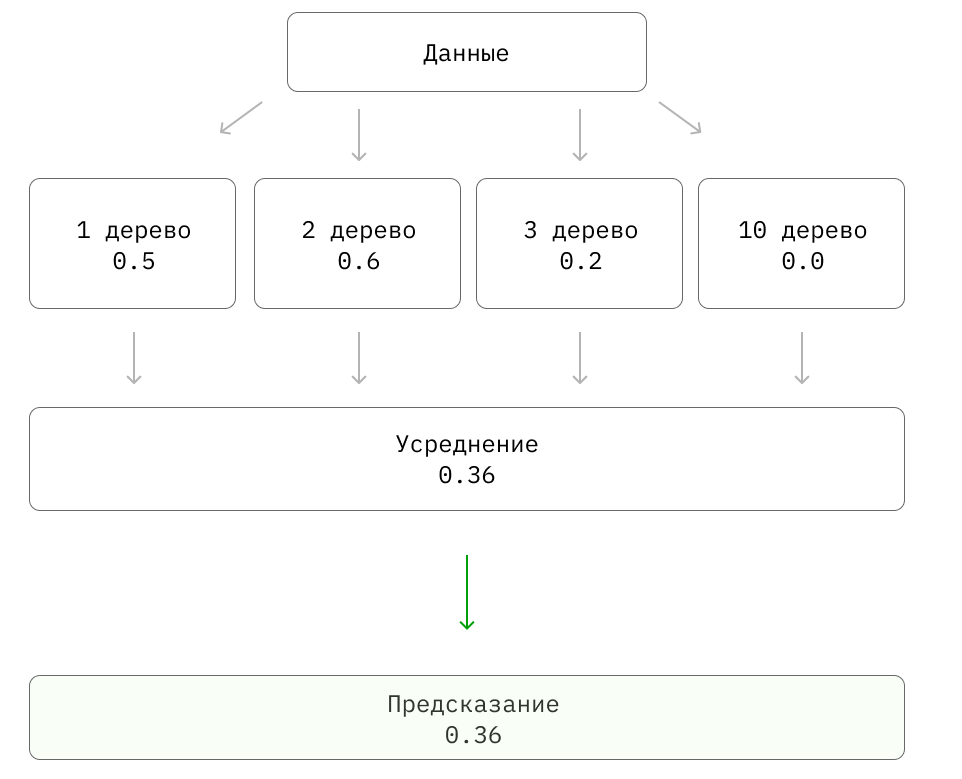

✍️ Давайте проверим на практике, что случайный лес улучшает предсказание случайного дерева. 

Для этого возьмём датасет по решению задачи на прогрессирование диабета. Мы будем предсказывать уровень прогрессирования болезни относительно базового уровня (некоторая численная мера, насколько «сильно» болен пациент диабетом). Минимальное значение составляет 25, максимальное — 346. Далее посмотрим на распределение, чтобы убедиться, что это не многоклассовая классификация, данные нормированы и закодированы категориальным кодировщиком. 

Качество будем измерять по среднему квадрату ошибки (MSE) на кросс-валидации с точностью до второго знака после запятой. 

Для чистоты эксперимента возьмём решающее дерево с глубиной 10 (DecisionTreeRegressor) и случайный лес из 10 деревьев (параметр n_estimators) с глубиной 10 (RandomForestRegression). Предлагается исполнить код:

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


# Загрузим датасет из библиотеки
data = load_diabetes(as_frame=True)
# Создаем матрицу наблюдений
X = data['frame'].drop('target', axis=1)
# Создаем вектор правильных ответов
y = data['target']
 
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


<Axes: >

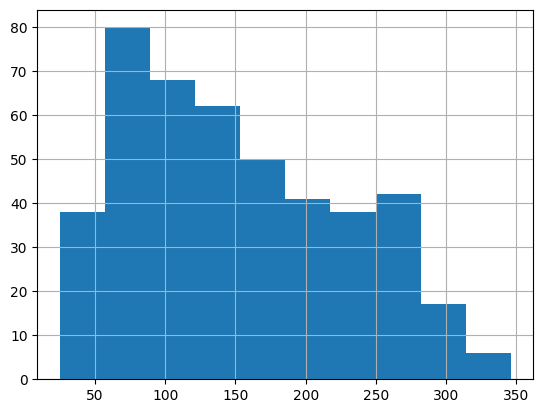

In [2]:
# Посмотрим на распределение целевого признака
y.hist()

In [7]:
# Разделим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


# Посмотрим на размерности выборок
print(f'Размерность обучающей выборки {X_train.shape}')
print(f'Размерность тестовой выборки {X_test.shape}')
# Будет выведено:
# Размерность обучающей выборки (296, 10)
# Размерность тестовой выборки (146, 10)


# Создаем модель дерева решений с максимальной глубиной 10
regr1 = DecisionTreeRegressor(
    max_depth=10, #максимальная глубина дерева
    random_state=42 #датчик генератора случайных чисел
)
# Обучаем модель
regr1.fit(X_train, y_train)


 
# Создаем модель случайного леса из 10 деревьев с максимальной глубиной 10 для каждого дерева
regr2 = RandomForestRegressor(
    max_depth=10, #максимальная глубина дерева
    n_estimators=10, #количество деревьев в ансамбле
    random_state=42 #датчик генератора случайных чисел
)
# Обучаем модель
regr2.fit(X_train, y_train)


# Формируем предсказания каждой из моделей
y_pred1 = regr1.predict(X_test)
y_pred2 = regr2.predict(X_test)
 
# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred1), 2)}')
print(f'Качество предсказания по MSE для случайного леса  {round(mean_squared_error(y_test, y_pred2), 2)}')


# Будет выведено:
# Качество предсказания по MSE для решающего дерева 6132.51
# Качество предсказания по MSE для случайного леса  3548.31

Размерность обучающей выборки (296, 10)
Размерность тестовой выборки (146, 10)
Качество предсказания по MSE для решающего дерева 6132.51
Качество предсказания по MSE для случайного леса  3533.73


⭐️ На примере случайного леса мы убедились, что качество базовой модели улучшают даже простейшие методы ансамблирования моделей, основанные на бутстрапе, такие как усреднение (Averaging) и голосование большинством (Majority Vote).

Давайте разберёмся, почему ансамблирование моделей улучшает качество. Дело в том, что идея ансамблирования основана на уменьшении разброса предсказаний модели.  

Доказано, что дисперсия ансамбля типа бэггинг (variance) в 'n' раз меньше, чем дисперсия отдельной базовой модели.

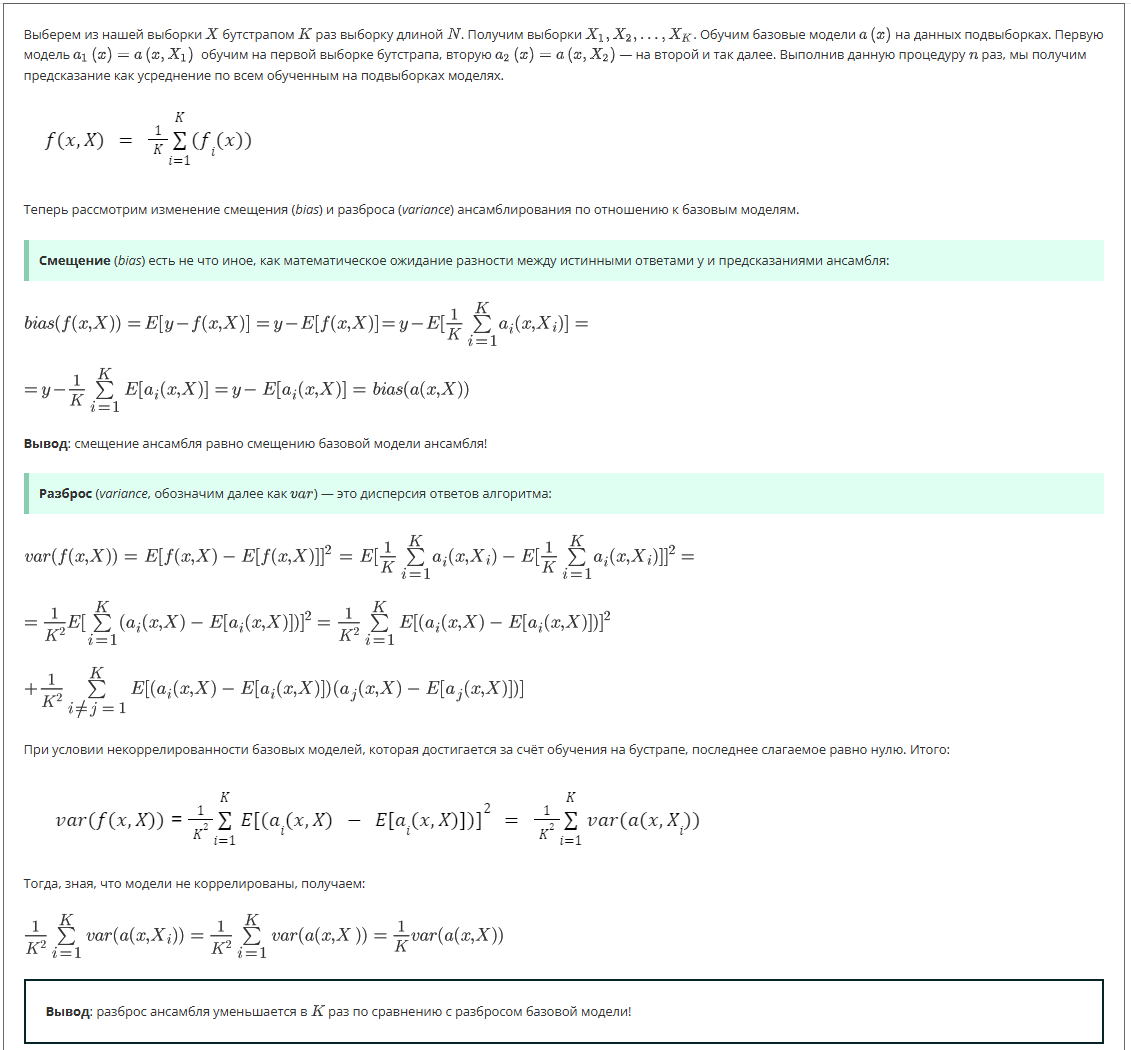

Эта методика применима не только к решающим деревьям, но и к другим моделям. Главное — чтобы базовые модели были максимально нескоррелированы. Такую методику часто используют в соревновательном Data Science на различных хакатонах и Kaggle-контестах. 

⭐️ В этом юните мы разобрали и научились применять на практике методы, лежащие в основе ансамблирования в случайном лесу. О более сложных методах поговорим в следующих юнитах.

# 3. Ансамблирование: блендинг и стекинг

**Стекинг (stacking)** — алгоритм построения ансамбля, в котором параллельно и независимо друг от друга обучаются несколько базовых моделей (необязательно одной природы), а их предсказания используются для обучения метамодели (финальная модель) как факторы.

Предсказания базовых алгоритмов называются **метапризнаками**.

### БЛЕНДИНГ

Простейшая реализация стекинга заключается в **блендинге** (blending). 

Схематично блендинг можно представить следующим образом:

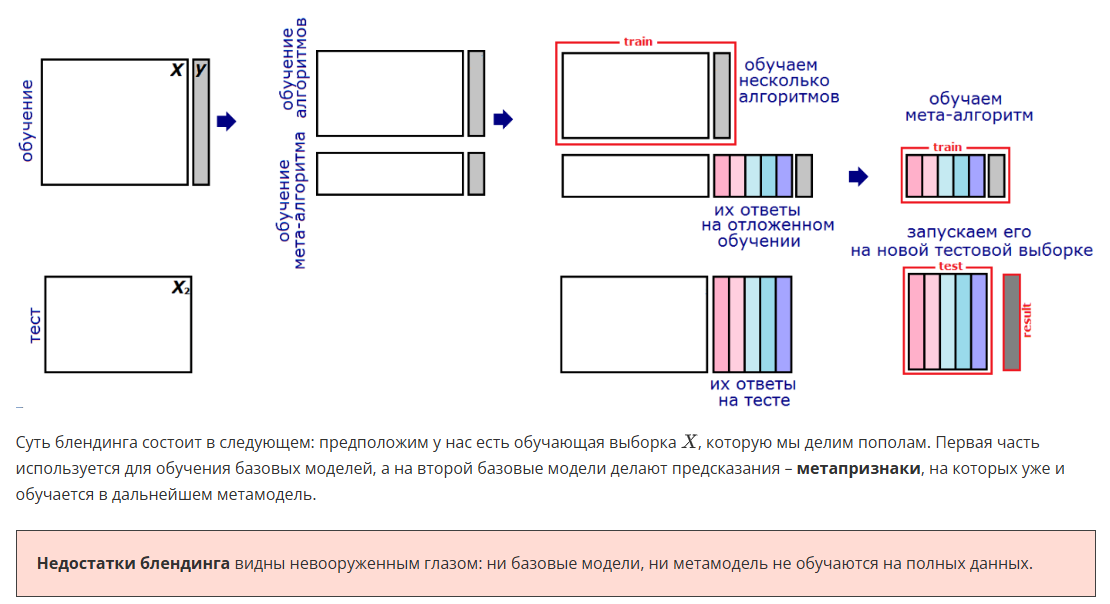

### СТЕКИНГ

Для решения этой проблемы используется усовершенствованная модель блендинга, которая имеет полноценное название — **стекинг**. Идея борьбы с недостатком блендинга — использование **кросс-валидации**.

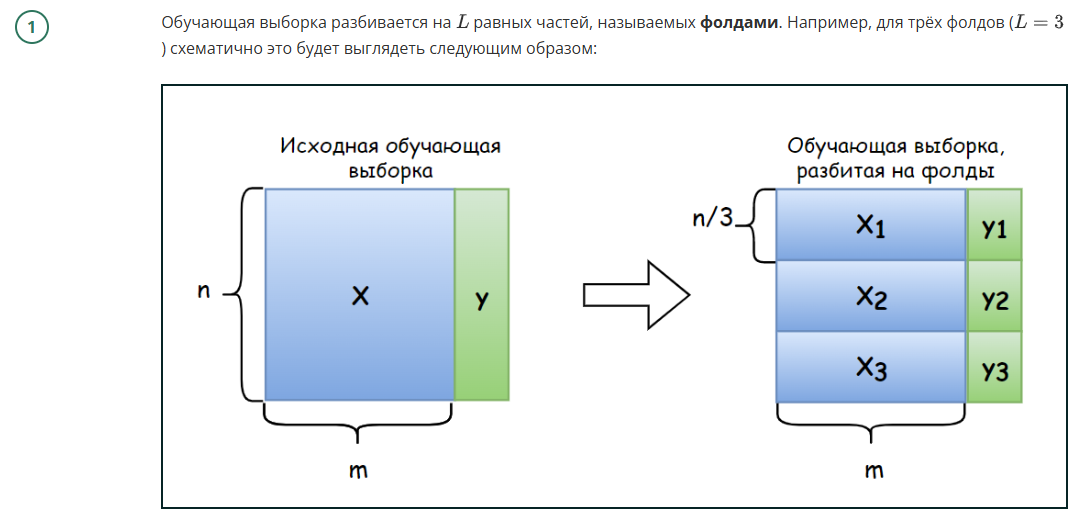

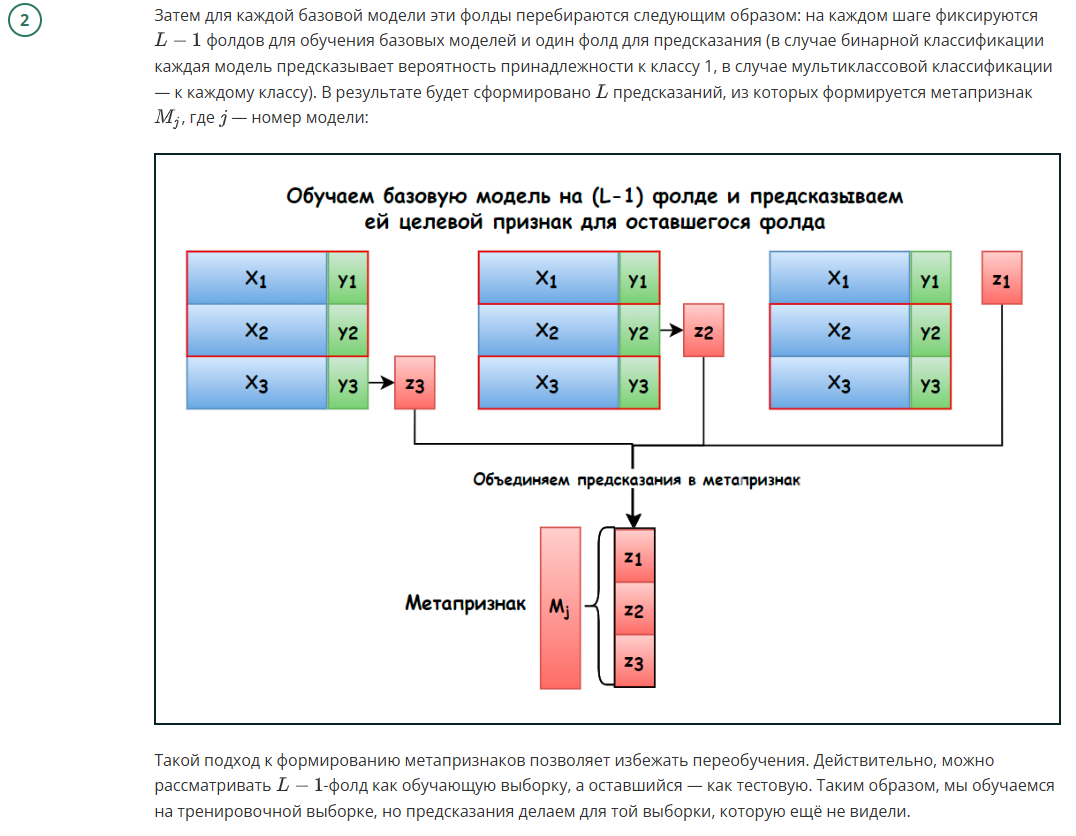

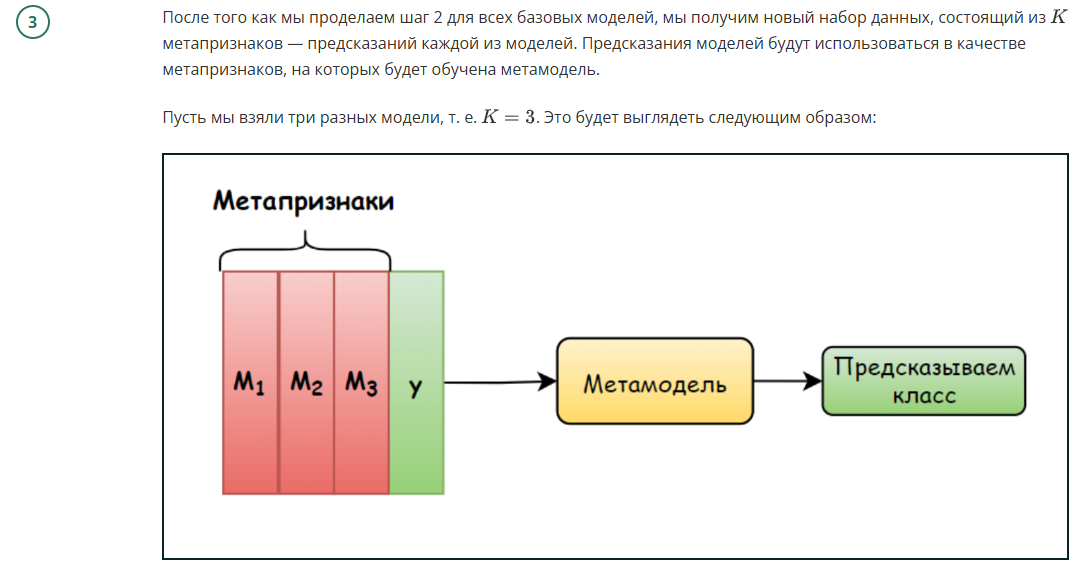

Примечание. Кроме метафакторов, метамодель может использовать для своего обучения изначальные признаки из исходного набора данных.

Давайте посмотрим, как работает алгоритм на конкретной таблице. Пусть у нас есть некоторый набор данных из четырёх признаков, характеризующих клиента (x_0, x_1, x_2 и x_3), и восемь наблюдений. На основе этих признаков необходимо предсказать бинарный целевой признак (y) покупки товара со значениями 1 (купил) и 0 (не купил). Будем использовать стекинг, состоящий из трёх различных моделей.

Разбиваем выборку на четыре фолда, то есть в каждом фолде будет по две строки таблицы (обозначены цветом). Обучаем каждую модель на трёх из этих фолдов и делаем предсказание вероятности покупки для оставшегося.

Из предсказаний будет сформировано три метапризнака (по одному на каждую базовую модель). Это будут предсказанные базовыми классификаторами вероятности покупки (вероятность принадлежности к классу 1).

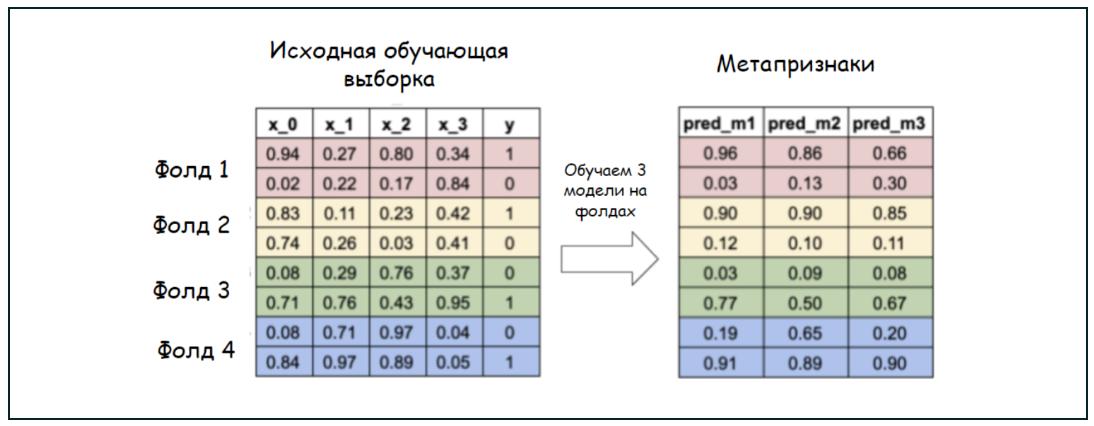

Формируем новый набор данных и отправляем его в метамодель, которая уже и делает финальное предсказание целевого признака покупки:

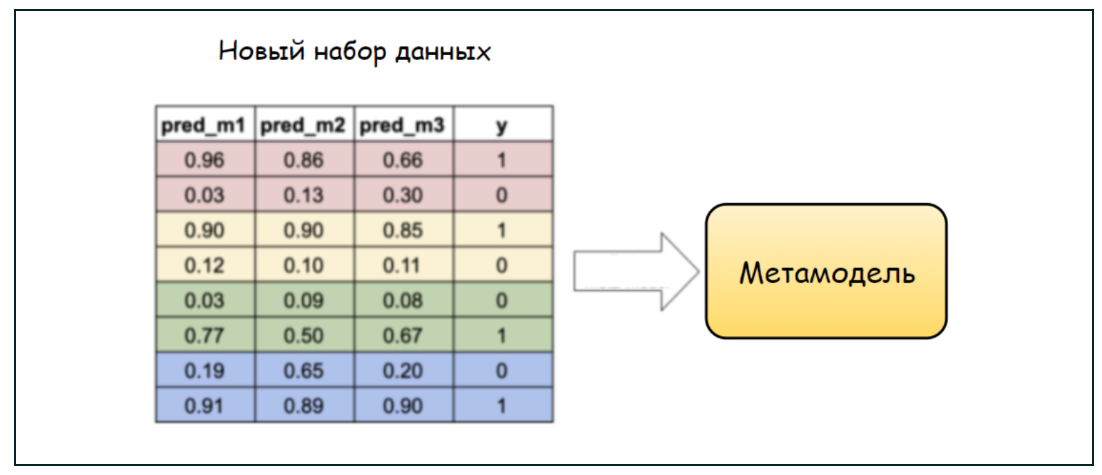

Метамодель будет производить поиск зависимостей в данных и принимать решение уже на основе предсказанных вероятностей покупки, которые были получены на первом этапе. 

В общем случае, когда у нас есть 'K' моделей, общая схема стекинга будет иметь вид:

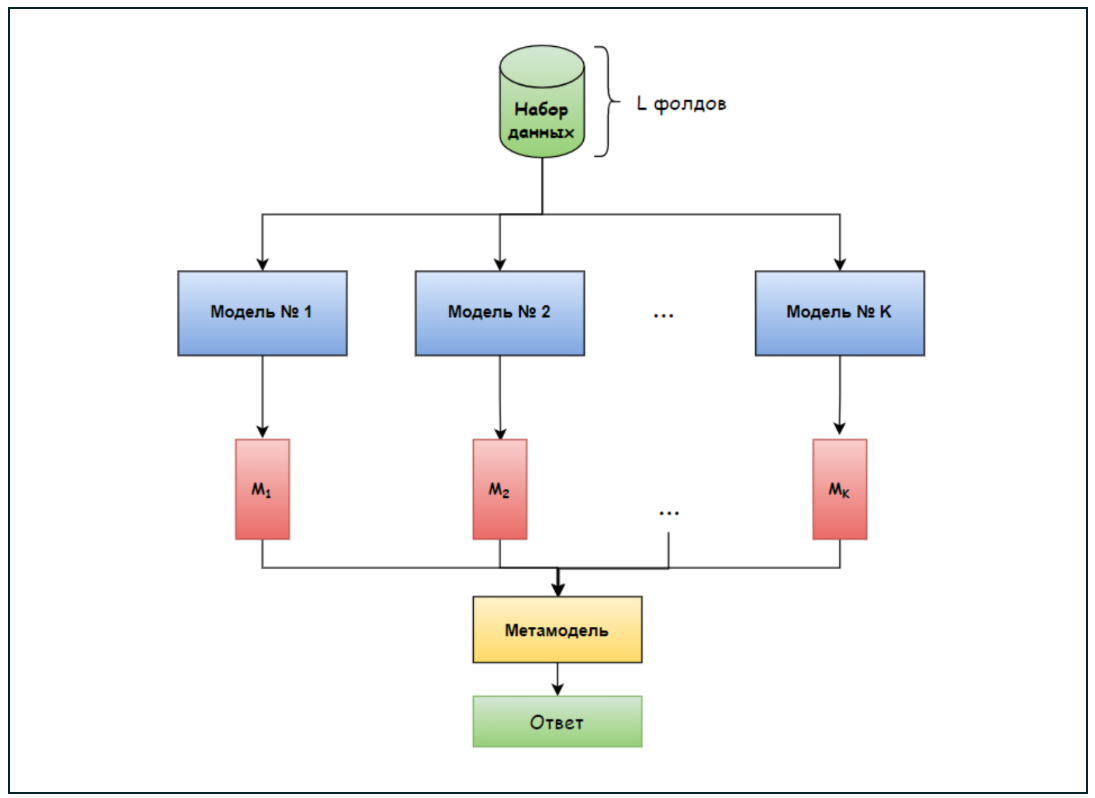

Важно понимать, стекинг — это чистая эвристика, эффективность которой доказана только практическим применением. Стекинг использует тот же подход, что и нейронные сети: предсказания предыдущего этапа (слоя) используются в качестве признаков для следующего этапа (слоя).

С точки зрения смещения и разброса, стекинг не имеет прямой математической интерпретации, так как не минимизирует напрямую ни ту, ни другую компоненту ошибки. Удачно работающий стекинг просто уменьшает ошибку, но гарантий уменьшения смещения или разброса нет.

Есть некоторые **рекомендации, как правильно строить стекинг:**

- В качестве метамоделей лучше всего применять простые модели: например, для задачи регрессии — линейную регрессию, а для задачи классификации — логистическую регрессию.
- В качестве базовых моделей лучшего всего использовать модели различной природы.

Из всех ансамблевых методов стекинг применяется реже всего. Главная причина: так как используется много разных моделей, необходимо подбирать их внешние параметры (коэффициенты регуляризации, глубина деревьев, число деревьев, темп обучения и т. д.) в совокупности, а подбор огромного количества параметров очень затратен по времени (мы убедились в этом в модуле по подбору внешних параметров моделей).

Вторая причина — в отличие от бэггинга и бустинга, для стекинга нет каких-то готовых решений, таких как случайный лес и градиентный бустинг над деревьями. Базовые модели нужно подбирать самому, а какие из них подойдут лучше всего — открытый вопрос.

Но, несмотря на эти недостатки, при грамотном подходе опытные специалисты выигрывают соревнования на Kaggle благодаря стекингу. Хотя зачастую таких участников называют «читерами» (от англ. cheat — «жульничать, обманывать»), ведь часто они собирают чуть ли не все возможные ML-модели в стекинг, запускают на мощном сервере подбор внешних параметров и комбинации из этих моделей в стекинге получают заветные 1.5 % прироста качества модели. На Kaggle даже существует фраза — «настекали».

В реальных условиях такой прирост значит мало, поэтому мы не будем концентрироваться на стекинге в нашем курсе, но пример разберём.

### Стекинг в SKLEARN

Стекинг для задачи регрессии имеет реализацию в библиотеке scikit-learn в классе StackingRegressor, для задачи классификации — в классе StackingClassifier. На вход подаётся список базовых моделей (атрибут estimators) и метамодель (атрибут final_estimator).

Примечание. Стоит понимать, что для задачи регрессии все базовые модели должны быть регрессорами, а для задачи классификации — классификаторами.  

Попробуем на практике применить стекинг, используя реализацию из библиотеки sklearn. В качестве входных данных будем использовать данные про диабет, использованные ранее. Обратимся снова к коду и обучим модель на данных.

Как и все ансамбли, модель стекинга находится в модуле ensemble.

In [8]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

Основные параметры StackingRegressor:

- estimators — список из кортежей базовых моделей в виде (str, model). Первым элементом в каждом кортеже идет строка с именем модели, вторым — собственно сама модель.
- final_estimator — метамодель.
- cv — количество фолдов, на которые делится выборка. По умолчанию используется пять фолдов.

Будем строить стекинг на следующих моделях:

- 'dt' — дерево решений;
- 'lr' — ридж-регрессия, линейная модель регрессии с L2-регуляризацией;
- случайный лес с количеством деревьев, равным 10, в качестве метамодели.

Примечание. В данном случае мы рассматриваем **RidgeCV**, которая представляет собой ридж-регрессию со встроенной кросс-валидацией по методу **Leave-One-Out Cross-Validation**. Подробнее читайте по ссылке: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html

Создадим список кортежей в формате ("наименование модели", модель) из этих моделей, и назовем его estimators:

In [9]:
#Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('lr', RidgeCV()),
    ('dt',  DecisionTreeRegressor(random_state=42))
]

Теперь, когда список из базовых моделей готов, создадим объект класса StackingRegressor. Первым аргументом передаём список из базовых моделей. Будем использовать в качестве метамодели модель случайного леса. Для этого передаём её в параметр final_estimator. Остальные параметры оставим по умолчанию.

Обучаем модель с помощью метода fit(), делаем предсказание классов с помощью метода predict(), а затем считаем метрики:

In [10]:
# Создаем объект класса стекинг
reg = StackingRegressor(
    estimators=estimators, #базовые модели в стекинге
    final_estimator=RandomForestRegressor( #метамодель
        n_estimators=10, #количество деревьев в ансамбле                    
        random_state=42 #датчик генератора случайных чисел
    )
)
# Обучаем модель
reg.fit(X_train, y_train)

,estimators,"[('lr', ...), ('dt', ...)]"
,final_estimator,RandomForestR...ndom_state=42)
,cv,None
,n_jobs,None
,passthrough,False
,verbose,0
,alphas,"(0.1, ...)"
,fit_intercept,True
,scoring,None
,cv,None
,gcv_mode,None


In [11]:
# Формируем предсказание для тестовой выборки
y_pred_stack = reg.predict(X_test)
# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для стекинга {round(mean_squared_error(y_test, y_pred_stack), 2)}')

# Будет выведено:
# Качество предсказания по MSE для стекинга 3464.11

Качество предсказания по MSE для стекинга 3467.74


Посмотреть на метапризнаки можно с помощью метода **transform()**. Для этого в метод нужно передать матрицу наблюдений X. В результате вызова метода для всех объектов каждая из двух моделей сделает предсказание вероятностей и вернёт матрицу из двух столбцов. Оформим её в виде DataFrame:

In [12]:
# Получаем мета-признаки из тренировочных данных
meta_data = reg.transform(X_train)
# Создаем DataFrame
meta_df = pd.DataFrame(
    meta_data, #содержимое таблицы
    columns=['meta_feature1', 'meta_feature2',] #название столбцов
)
meta_df.head()

,meta_feature1,meta_feature2
0,152.477333,154.0
1,202.022338,192.0
2,133.718464,116.0
3,146.698345,81.0
4,169.783292,122.0


↑ Наша таблица метапризнаков, на которой происходит обучение метамодели случайного леса. 

Примечание. При желании к метапризнакам можно добавить столбцы из изначального набора данных и попробовать обучить модель на этом наборе данных.

 ⬇️ Мы рассмотрели основные принципы работы стекинга и его реализацию в sklearn. Попробуйте применить стекинг для решения следующей задачи.

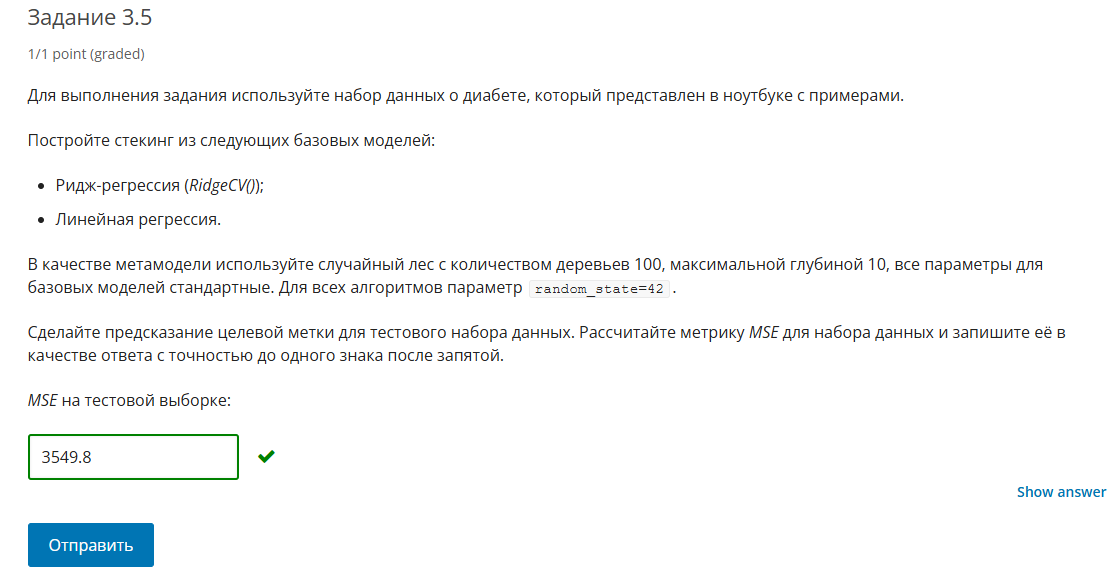

In [13]:
from sklearn.linear_model import LinearRegression
estimators = [
    ('rr', RidgeCV()),
    ('lr',  LinearRegression())
]

reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
)
#Обучаем модель
reg.fit(X_train, y_train)

,estimators,"[('rr', ...), ('lr', ...)]"
,final_estimator,RandomForestR...ndom_state=42)
,cv,None
,n_jobs,None
,passthrough,False
,verbose,0
,alphas,"(0.1, ...)"
,fit_intercept,True
,scoring,None
,cv,None
,gcv_mode,None


In [14]:
y_pred_stack = reg.predict(X_test)
print(f'Качество предсказания по MSE для стекинга {round(mean_squared_error(y_test, y_pred_stack),1)}')

Качество предсказания по MSE для стекинга 3534.7
